In [2]:
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.tag import pos_tag
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer

def lemmatize_text(text):
    """helper function that lemmatizes already tokenized text
    """

    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(w, "v") for w in text])


def remove_punctuations(text):
    """removes all the symboles defined in punc

    :param text: string of which we want the symboles to be removed
    :type text: string
    :rtype: string
    """
    punc = '''!()-[]{};:'"\,<>./?@$%^&*_~'''
    for punctuation in punc:
        text = text.replace(punctuation, '')
    return text


path = r"C:\Users\AMOR 1\Documents\Uni\Twitter-privacy-lda-topic-modelling\data\experiment.tsv"
df=pd.read_csv(path, sep='\t', header=None)
df[0] = df[0].str.lower()
df[0] = df[0].str.replace("@xxx", "")
df[0] = df[0].apply(remove_punctuations)
df[0] = df[0].apply(word_tokenize)
df[0] = df[0].apply(lambda x: [item for item in x if item not in stop])
df[0] = df[0].apply(lemmatize_text)

pos = []
neg = []




In [3]:
df[1][8]


0

In [4]:

for ind in df.index:
    if df[1][ind] == 1:
        pos.append(df[0][ind])
    else: 
        neg.append(df[0][ind])

In [5]:
print(len(pos))
print(len(neg))
words = pos
string = ""
for str in words:
    string = string + " " + str

1435
1435


In [6]:
print(string)

 like break glass best leave lay hurt pick back try put back together # makesnosence love get free chipotle thank give life outside grad school dinner ice cream lovelovelove feel black top burn souls shoe hit good old 103 degrees swear life constant cycle pizza feel like hold pretty well lol speak ever fun rest royals world series kansas city sport team championship unbelievable ace botany exam time party idk much art history take im fun supportive type friend nitro paintball today 12 noonjoin fun bring whole family family friendly atmosphere35 entire day include gear hong kong express hot sour soup=the best full metal jacket intense movie # loveit lovely anniversary dinner mac cheese cup give alot great hear first day class shes good far today complaints kid hold tweet 2k awhile go family friends wouldnt today wo awesome peachwave tastebuds party house card season finale ok anyone want loan stave make mac cheese lunch # downwitheasymac postseason take sanity sleep phone battery every 

In [7]:
words = word_tokenize(string)

In [8]:
# Create a frequency dictionary for all the words in Harry Potter
# with open('words.json', 'r') as fp:
#    words =  json.load(fp)

# Use Frequency Distribution function from NLTK
freq_distribution = FreqDist(words)
freq_d = dict(freq_distribution)
print(freq_d)

{'like': 77, 'break': 20, 'glass': 5, 'best': 66, 'leave': 10, 'lay': 4, 'hurt': 4, 'pick': 5, 'back': 42, 'try': 24, 'put': 14, 'together': 3, '#': 424, 'makesnosence': 1, 'love': 111, 'get': 180, 'free': 8, 'chipotle': 1, 'thank': 22, 'give': 17, 'life': 41, 'outside': 6, 'grad': 1, 'school': 13, 'dinner': 7, 'ice': 7, 'cream': 5, 'lovelovelove': 1, 'feel': 30, 'black': 5, 'top': 8, 'burn': 7, 'souls': 2, 'shoe': 1, 'hit': 12, 'good': 85, 'old': 27, '103': 2, 'degrees': 1, 'swear': 5, 'constant': 1, 'cycle': 1, 'pizza': 3, 'hold': 4, 'pretty': 16, 'well': 14, 'lol': 42, 'speak': 3, 'ever': 20, 'fun': 28, 'rest': 8, 'royals': 9, 'world': 27, 'series': 4, 'kansas': 5, 'city': 9, 'sport': 10, 'team': 18, 'championship': 4, 'unbelievable': 4, 'ace': 1, 'botany': 1, 'exam': 2, 'time': 104, 'party': 8, 'idk': 2, 'much': 37, 'art': 3, 'history': 2, 'take': 27, 'im': 89, 'supportive': 2, 'type': 3, 'friend': 15, 'nitro': 1, 'paintball': 1, 'today': 59, '12': 6, 'noonjoin': 1, 'bring': 13, 'w

In [9]:
# Use sorted() to create a ranked list of words
# Print out each word and the number of times it repeats
ranked_list = sorted(freq_d, key=freq_d.get, reverse = True)

ranked_list.remove('#')
ranked_list.remove('get')
for i in range(0,len(freq_d)):
    key = ranked_list[i]
    value = freq_d[key]
    print(key,value)


love 111
go 111
time 104
one 90
im 89
good 85
day 80
like 77
know 75
best 66
today 59
want 53
dont 52
great 47
make 45
first 44
back 42
lol 42
work 42
really 42
life 41
think 41
watch 39
come 38
much 37
people 35
new 35
look 35
say 35
need 35
see 35
tweet 33
home 33
game 33
cant 31
happy 31
feel 30
ive 30
right 29
let 29
fun 28
old 27
world 27
take 27
friends 27
use 27
would 27
start 27
tomorrow 27
eat 26
days 26
year 26
awesome 25
youre 25
try 24
could 24
play 23
wait 23
guy 23
long 23
thank 22
sleep 22
show 22
even 22
miss 21
picture 21
thing 21
break 20
ever 20
live 20
thats 20
oh 20
big 20
always 20
hard 19
weekend 19
man 19
walk 19
didnt 19
team 18
movie 18
anyone 18
phone 18
snow 18
call 18
favorite 18
two 18
us 18
give 17
way 17
someone 17
na 17
amp 17
keep 17
pretty 16
birthday 16
mean 16
please 16
friend 15
season 15
god 15
car 15
girl 15
win 15
ill 15
rock 15
night 15
word 15
things 15
put 14
well 14
class 14
amaze 14
meet 14
sure 14
lose 14
ready 14
little 14
find 14
bad 14


flip 2
yo 2
crawl 2
tho 2
ihop 2
north 2
skull 2
ufc 2
improve 2
gun 2
lonely 2
lady 2
goodbye 2
downtown 2
inform 2
gossip 2
freeze 2
nobody 2
videos 2
precious 2
adventure 2
website 2
option 2
diamond 2
olympics 2
nt 2
sheep 2
hello 2
limit 2
succeed 2
j 2
husband 2
qualities 2
blind 2
contact 2
delete 2
tmobile 2
sock 2
v 2
cross 2
photos 2
fine 2
zone 2
heyy 2
… 2
south 2
dodge 2
squad 2
invisible 2
social 2
mess 2
racquetball 2
shirt 2
storm 2
slowly 2
letter 2
smc 2
chicago 2
edit 2
bird 2
raw 2
bobby 2
yee 2
makesnosence 1
chipotle 1
grad 1
lovelovelove 1
shoe 1
degrees 1
constant 1
cycle 1
ace 1
botany 1
nitro 1
paintball 1
noonjoin 1
friendly 1
atmosphere35 1
gear 1
hong 1
kong 1
express 1
soup=the 1
jacket 1
anniversary 1
alot 1
2k 1
awhile 1
wo 1
peachwave 1
tastebuds 1
loan 1
stave 1
downwitheasymac 1
postseason 1
sanity 1
battery 1
ounce 1
yankees 1
aaaaaaaand 1
arounds 1
pensacola 1
funtimes 1
curse 1
imissmylongdistancefriends 1
fart 1
oral 1
howembarrassing 1
badgrade 1

icecream 1
duh 1
partyovahere 1
patch 1
livinthelife 1
collapse 1
player 1
greysanatomy 1
howtosavealife 1
mcdreamy 1
derrick 1
thomass 1
sack 1
lanie 1
dan 1
croll 1
shitltltlt 1
rough 1
mouthhurts 1
mouth 1
napthats 1
hero 1
preparation 1
seven 1
dust 1
tablet 1
fanart 1
unlucky 1
seem 1
zombies 1
scar 1
cantstop 1
hipster 1
natural 1
18 1
bat 1
avengers 1
midnight 1
capn 1
theistic 1
statement 1
tweeze 1
eyebrows 1
sophomore 1
junior 1
asap 1
thingsimgoingtomiss 1
balance 1
fest 1
pretensions 1
biz 1
practicetime 1
thankyoubelmont 1
mobster 1
mass 1
talented 1
ashesjust 1
lastnight 1
sweetsif 1
perfectly 1
gtgtgt 1
lordy 1
vamp 1
upset 1
banana 1
rotten 1
sisters 1
stronger 1
strongerso 1
happier 1
aoe 1
screen 1
protector 1
fingerprint 1
9am 1
thou 1
exalt 1
reputation 1
applause 1
poor 1
medication 1
400 1
nicest 1
bellew 1
6163 1
dual 1
33 1
bravesnation 1
zoidburg 1
meme 1
comedy 1
difference 1
mysummer 1
theavengers 1
bun 1
however 1
bighairprobs 1
discover 1
florence 1
welch 1

highly 1
honorable 1
creditable 1
oneself 1
scene 1
ra 1
mod 1
furniture 1
startup 1
sled 1
trouble 1
befriend 1
cyclones 1
morg44 1
milkshake 1
wizard 1
thefanspodcast 1
cleveland 1
mi 1
tb 1
98 1
47 1
hearts 1
disappoint 1
rcjh 1
latest 1
column 1
edge 1
bow 1
strike 1
lilac 1
nick 1
medal 1
athletesfollow 1
knockoffs 1
flappy 1
relaxation 1
carrie 1
cuteness 1
kitten 1
mid 1
sellin 1
lynch 1
audacity 1
bd 1
shaw 1
grace 1
basements 1
eclipse 1
thefblife 1
ireland 1
pen 1
hurry 1
storyofmylife 1
inspiration 1
thisi 1
nearly 1
couch 1
wohayy 1
howl 1
lsmith017 1
cornelltim 1
reid 1
factual 1
knowim 1
hack 1
lifebreath 1
930 1
practing 1
solo 1
recital 1
bohanan25 1
galaxy 1
s2 1
oldnetural 1
mall 1
cone 1
time=sunday 1
thingya 1
variety 1
chicks 1
suprised 1
multitask 1
dogthats 1
slow 1
vollies 1
saurons 1
bane 1
combo 1
mei 1
homie 1
twin 1
2816103630 1
sayingsforgirls 1
clock 1
blt 1
abrewing 1
optional 1
horn 1
evil 1
attitude 1
deliciously 1
myna 1
porch 1
buzz 1
visitor 1
opinio

IndexError: list index out of range

In [10]:
# Print ranking after eliminating stop words
stop_words = set(stopwords.words("english"))
words = set(words)
unique_words = []

for word in ranked_list:
    if word.lower() not in stop_words:
        print(word,':',freq_d[word])


love : 111
go : 111
time : 104
one : 90
im : 89
good : 85
day : 80
like : 77
know : 75
best : 66
today : 59
want : 53
dont : 52
great : 47
make : 45
first : 44
back : 42
lol : 42
work : 42
really : 42
life : 41
think : 41
watch : 39
come : 38
much : 37
people : 35
new : 35
look : 35
say : 35
need : 35
see : 35
tweet : 33
home : 33
game : 33
cant : 31
happy : 31
feel : 30
ive : 30
right : 29
let : 29
fun : 28
old : 27
world : 27
take : 27
friends : 27
use : 27
would : 27
start : 27
tomorrow : 27
eat : 26
days : 26
year : 26
awesome : 25
youre : 25
try : 24
could : 24
play : 23
wait : 23
guy : 23
long : 23
thank : 22
sleep : 22
show : 22
even : 22
miss : 21
picture : 21
thing : 21
break : 20
ever : 20
live : 20
thats : 20
oh : 20
big : 20
always : 20
hard : 19
weekend : 19
man : 19
walk : 19
didnt : 19
team : 18
movie : 18
anyone : 18
phone : 18
snow : 18
call : 18
favorite : 18
two : 18
us : 18
give : 17
way : 17
someone : 17
na : 17
amp : 17
keep : 17
pretty : 16
birthday : 16
mean : 1

useless : 2
rather : 2
2011 : 2
design : 2
epic : 2
grill : 2
secretary : 2
graduate : 2
debate : 2
others : 2
pass : 2
draw : 2
lecture : 2
teeth : 2
source : 2
silver : 2
spirit : 2
hide : 2
michael : 2
riot : 2
mood : 2
kitchen : 2
syllabus : 2
snowflakes : 2
fit : 2
8th : 2
spell : 2
ap : 2
sandwich : 2
highlight : 2
graduation : 2
mma : 2
ahhh : 2
travelers : 2
wife : 2
chick : 2
rite : 2
stick : 2
incredible : 2
commercials : 2
later : 2
wheel : 2
bunch : 2
sell : 2
league : 2
correct : 2
knee : 2
desk : 2
crew : 2
gatsby : 2
war : 2
harry : 2
potter : 2
ahhhhh : 2
men : 2
hall : 2
talents : 2
daily : 2
horse : 2
stress : 2
princess : 2
literature : 2
suit : 2
arm : 2
ohio : 2
title : 2
pregame : 2
respect : 2
twitter : 2
mountain : 2
obsession : 2
prayer : 2
young : 2
train : 2
hah : 2
buddy : 2
kiss : 2
legs : 2
yesterday : 2
reach : 2
possible : 2
bball : 2
compliment : 2
minute : 2
scott : 2
wrestle : 2
manager : 2
boyfriend : 2
bank : 2
board : 2
afraid : 2
hometown : 2
moms

internetcheck : 1
spiritual : 1
ebb : 1
directly : 1
traceable : 1
flicker : 1
feebleness : 1
carson : 1
daylightsavings : 1
reception : 1
attention : 1
springbreak : 1
anyway : 1
traffic : 1
manthis : 1
university : 1
haunt : 1
jeff : 1
tournament : 1
master : 1
list : 1
tues : 1
22415 : 1
1pm : 1
westborough : 1
accordingly : 1
a335 : 1
pop : 1
swift : 1
freak : 1
victorious : 1
expert : 1
atleastican2step : 1
betcha : 1
leslie : 1
sisterinlaw : 1
whatev : 1
staycation : 1
alaska : 1
cherish : 1
vibe : 1
ware : 1
hadley : 1
woot : 1
lt333 : 1
2nd : 1
civic : 1
gogetit : 1
whateverittakes : 1
jump : 1
capella : 1
quickly : 1
finals : 1
iwantaring : 1
root : 1
ethan : 1
somethingborrowed : 1
tax : 1
rate : 1
plenty : 1
easilyatracttedto : 1
545 : 1
themostwonderfultime : 1
ylvis : 1
stupidest : 1
educational : 1
preschool : 1
rich : 1
peanut : 1
mampms : 1
stupid : 1
machine : 1
dollar : 1
starve : 1
yell : 1
gross : 1
memorial : 1
tigerbasketball : 1
valentines : 1
babay : 1
pwnedit :

olympic : 1
standard : 1
zimbios : 1
firefly : 1
jayne : 1
zimbio : 1
sushi : 1
campout : 1
cutie : 1
la : 1
gondolas : 1
quincy : 1
il : 1
mcm : 1
ohp : 1
sniff : 1
alright : 1
20110205 : 1
topic : 1
pursuit : 1
seventeen : 1
purple : 1
danieltosh : 1
coffeetin7 : 1
status : 1
bryanl1990 : 1
mehold : 1
handclose : 1
eyestake : 1
breathn : 1
footcake : 1
ooh : 1
meg : 1
turd : 1
kuawb : 1
prop : 1
ocho : 1
spur : 1
gospursgo : 1
photobooth : 1
tactics : 1
nike : 1
expand : 1
china : 1
korea : 1
heyyyyyy : 1
tracipletch : 1
currently : 1
negativity : 1
behind : 1
tons : 1
twttr : 1
fur : 1
moses : 1
coyote : 1
civ : 1
feelin : 1
yeee : 1
frizzle : 1
fruit : 1
olathe : 1
bhutizak : 1
available : 1
respectively : 1
aha : 1
carrots : 1
iphone : 1
apologize : 1
onyx : 1
rehearsal : 1
bury : 1
wwjd : 1
bracelet : 1
stitch : 1
atta : 1
stl : 1
fa : 1
daayysss : 1
gs : 1
efrakes09 : 1
mystics : 1
wag : 1
accidentally : 1
bearline : 1
econ : 1
nooww : 1
skullgirls : 1
ucfs : 1
homecoming : 1
ho

shaw : 1
grace : 1
basements : 1
eclipse : 1
thefblife : 1
ireland : 1
pen : 1
hurry : 1
storyofmylife : 1
inspiration : 1
thisi : 1
nearly : 1
couch : 1
wohayy : 1
howl : 1
lsmith017 : 1
cornelltim : 1
reid : 1
factual : 1
knowim : 1
hack : 1
lifebreath : 1
930 : 1
practing : 1
solo : 1
recital : 1
bohanan25 : 1
galaxy : 1
s2 : 1
oldnetural : 1
mall : 1
cone : 1
time=sunday : 1
thingya : 1
variety : 1
chicks : 1
suprised : 1
multitask : 1
dogthats : 1
slow : 1
vollies : 1
saurons : 1
bane : 1
combo : 1
mei : 1
homie : 1
twin : 1
2816103630 : 1
sayingsforgirls : 1
clock : 1
blt : 1
abrewing : 1
optional : 1
horn : 1
evil : 1
attitude : 1
deliciously : 1
myna : 1
porch : 1
buzz : 1
visitor : 1
opinion : 1
irrelevant : 1
brown : 1
kiddos : 1


In [11]:
# Print the ranking of all proper nouns

filtered_d = {}
# Remove any anomalies

for word in ranked_list:
    filtered_d[word] = freq_d[word]
    print(word,':',freq_d[word])

love : 111
go : 111
time : 104
one : 90
im : 89
good : 85
day : 80
like : 77
know : 75
best : 66
today : 59
want : 53
dont : 52
great : 47
make : 45
first : 44
back : 42
lol : 42
work : 42
really : 42
life : 41
think : 41
watch : 39
come : 38
much : 37
people : 35
new : 35
look : 35
say : 35
need : 35
see : 35
tweet : 33
home : 33
game : 33
cant : 31
happy : 31
feel : 30
ive : 30
right : 29
let : 29
fun : 28
old : 27
world : 27
take : 27
friends : 27
use : 27
would : 27
start : 27
tomorrow : 27
eat : 26
days : 26
year : 26
awesome : 25
youre : 25
try : 24
could : 24
play : 23
wait : 23
guy : 23
long : 23
thank : 22
sleep : 22
show : 22
even : 22
miss : 21
picture : 21
thing : 21
break : 20
ever : 20
live : 20
thats : 20
oh : 20
big : 20
always : 20
hard : 19
weekend : 19
man : 19
walk : 19
didnt : 19
team : 18
movie : 18
anyone : 18
phone : 18
snow : 18
call : 18
favorite : 18
two : 18
us : 18
give : 17
way : 17
someone : 17
na : 17
amp : 17
keep : 17
pretty : 16
birthday : 16
mean : 1

source : 2
silver : 2
spirit : 2
hide : 2
michael : 2
riot : 2
mood : 2
kitchen : 2
syllabus : 2
snowflakes : 2
fit : 2
8th : 2
spell : 2
ap : 2
sandwich : 2
highlight : 2
graduation : 2
mma : 2
ahhh : 2
travelers : 2
wife : 2
chick : 2
rite : 2
stick : 2
incredible : 2
commercials : 2
later : 2
wheel : 2
bunch : 2
sell : 2
league : 2
correct : 2
knee : 2
desk : 2
crew : 2
gatsby : 2
war : 2
harry : 2
potter : 2
ahhhhh : 2
men : 2
hall : 2
talents : 2
daily : 2
horse : 2
stress : 2
princess : 2
literature : 2
suit : 2
arm : 2
ohio : 2
title : 2
pregame : 2
respect : 2
twitter : 2
mountain : 2
obsession : 2
prayer : 2
young : 2
train : 2
hah : 2
buddy : 2
kiss : 2
legs : 2
yesterday : 2
reach : 2
possible : 2
bball : 2
compliment : 2
minute : 2
scott : 2
wrestle : 2
manager : 2
boyfriend : 2
bank : 2
board : 2
afraid : 2
hometown : 2
moms : 2
gorgeous : 2
todays : 2
story : 2
bon : 2
outta : 2
spin : 2
fantasy : 2
answer : 2
huge : 2
knowledge : 2
hop : 2
worth : 2
adam : 2
green : 2
di

preschool : 1
rich : 1
peanut : 1
mampms : 1
stupid : 1
machine : 1
dollar : 1
starve : 1
yell : 1
gross : 1
memorial : 1
tigerbasketball : 1
valentines : 1
babay : 1
pwnedit : 1
schoolgrind : 1
instagrammed : 1
level : 1
todayas : 1
character : 1
stillits : 1
coolios : 1
aliceandwonderland : 1
print : 1
westminster : 1
woods : 1
sleepover : 1
beverages : 1
90s : 1
checkitout : 1
goodshit : 1
sweetheart : 1
sooo : 1
liners : 1
voyage : 1
strange : 1
seas : 1
math : 1
arthur : 1
intern : 1
maggieemarshall : 1
hurd : 1
middle : 1
minus2 : 1
qb : 1
punt : 1
dye : 1
theresas : 1
wakeupcall : 1
justmyluck : 1
15 : 1
min : 1
iclicker : 1
outfit : 1
salt : 1
argue : 1
neglect : 1
thestory : 1
cutedog : 1
executive : 1
decision : 1
needmoney : 1
destiny : 1
note : 1
sharpie : 1
damage : 1
scenes : 1
dundies : 1
remembertocall : 1
getsmeeverytime : 1
oil : 1
5000 : 1
dadreally : 1
2morrow : 1
revolutionga : 1
grand : 1
815 : 1
945 : 1
1115 : 1
holdon2yerseats : 1
rad : 1
highquality : 1
assets 

levine : 1
molliecp : 1
ayee : 1
mins : 1
snoozalicious : 1
dew : 1
pssh : 1
ipod : 1
flop : 1
ruby : 1
swimmin : 1
soggy : 1
crisp : 1
owl : 1
scriptures : 1
applaud : 1
efforts : 1
h20yas : 1
coolest : 1
yourse… : 1
nba : 1
commonwhtgirl : 1
karascheel : 1
tooth : 1
hustle : 1
becuz : 1
development : 1
ilovebeingblack : 1
quit : 1
online : 1
strength : 1
lily : 1
whitneyclaire13 : 1
mlb : 1
activities : 1
sixth : 1
aaron : 1
chrome : 1
netbook : 1
gizmo : 1
hi : 1
hansen : 1
jfakestevecarell : 1
stanley : 1
pheebs : 1
proof : 1
minus : 1
25 : 1
question : 1
specify : 1
14 : 1
landon : 1
desoto : 1
italian : 1
custard : 1
brighten : 1
someones : 1
backroading : 1
crucial : 1
bu : 1
ethicschat : 1
fiance : 1
chuck : 1
norris : 1
sac : 1
conversation : 1
chumby : 1
rescue : 1
adoptions : 1
kijiji : 1
tulsa : 1
sanitize : 1
rubiks : 1
cube : 1
equivalent : 1
cornbread : 1
starbucks : 1
spontaneity : 1
jacob : 1
jake15 : 1
explain : 1
redken5thave : 1
stylist : 1
hailey : 1
childhoodfacts

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(filtered_d, orient = 'index').iloc[0:50]

           0
im       185
fuck     141
like     132
know     124
dont     118
go       115
shit     108
people   107
one       95
time      86
good      84
make      79
work      79
lol       78
love      77
think     72
bitch     72
day       66
ass       66
say       65
want      55
come      54
take      52
see       51
life      50
drink     49
god       49
youre     48
look      46
cant      45
na        44
tell      43
need      42
girl      40
guy       40
really    39
girls     37
someone   37
much      37
give      37
today     36
call      36
home      36
man       36
kid       35
thats     35
hate      34
old       34
mean      33
ill       33


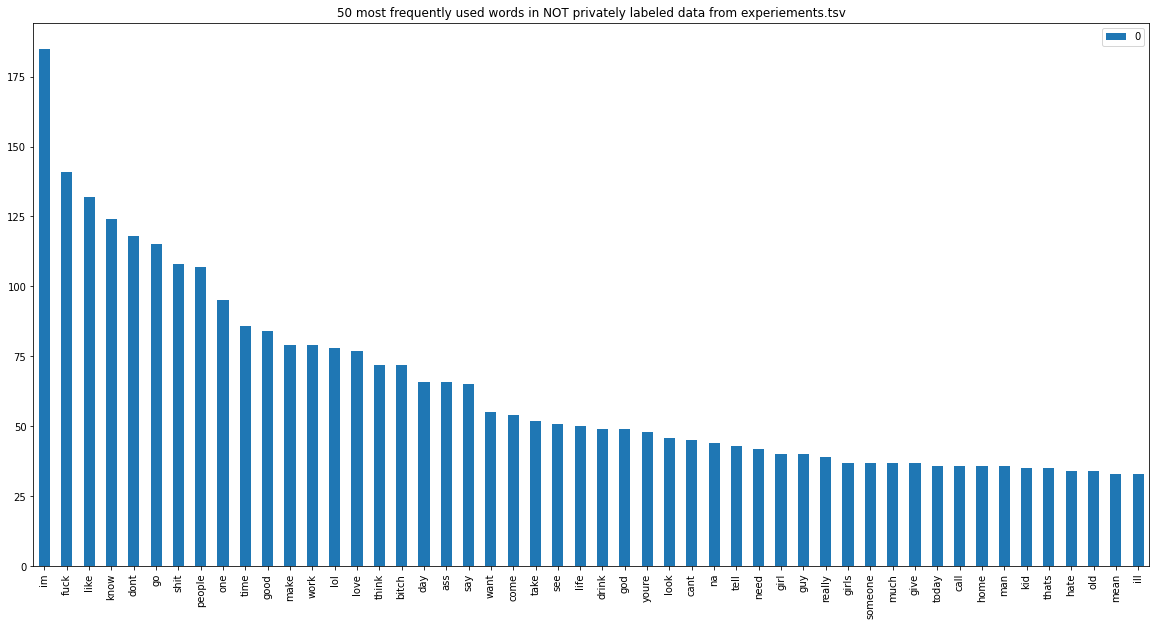

In [154]:
# Put the dictionary into a Data Frame and print out a bar graph


print(df)

ax = df.plot.bar(figsize = (20,10), title= '50 most frequently used words in NOT privately labeled data from experiements.tsv')
ax.figure.savefig('neg_hist.pdf')

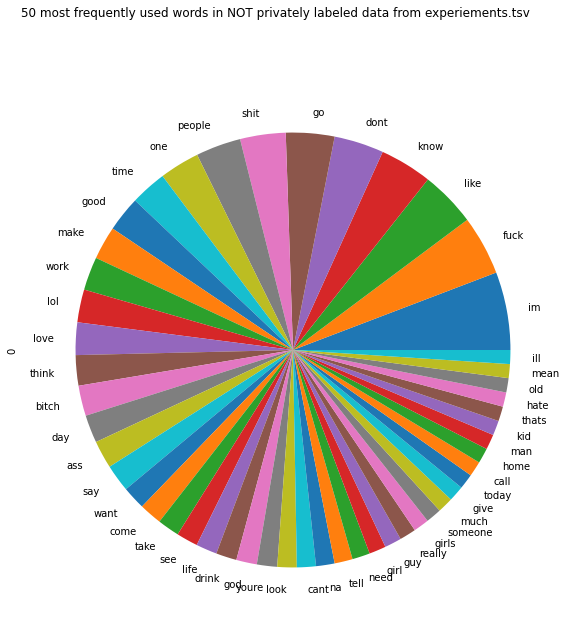

In [155]:
pie = df.plot.pie(legend=False, subplots=True, figsize = (20,10), title= '50 most frequently used words in NOT privately labeled data from experiements.tsv')
fig = pie[0].get_figure()

fig.savefig('neg_Pie.pdf')

In [15]:
pd.DataFrame(df.index).to_csv('experiment_dictionary.txt', header=None, index=None, sep=' ', mode='a')

'im'